In [1]:
%matplotlib inline
# %matplotlib

In [2]:
import time

In [3]:
from __future__ import division,print_function

In [4]:
from spartan.utils.sklearn import model_assessment, feature_selection
from spartan.utils.sklearn import pandas_helpers

In [5]:
from collections import Counter, defaultdict
import math

import numpy as np
import pandas as pd
import sklearn as skl
import sklearn.preprocessing as ppro

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from sklearn.decomposition import PCA, RandomizedPCA, KernelPCA, FactorAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.grid_search import GridSearchCV

from sklearn.cross_validation import train_test_split

from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.dummy import DummyClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RandomizedLogisticRegression
from sklearn.linear_model import Lasso

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, univariate_selection
from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import confusion_matrix



In [6]:
from matplotlib import pyplot as plt
import seaborn as sns

In [7]:
sns.set_context('poster')

In [8]:
gus_processed_path = '/home/gus/MEGAsync/zim/main/BCH/Projects/Jodie_and_James/labeled_data_gus.csv'
gus_processed_data = pd.read_csv(gus_processed_path)
gus_processed_data.head()

/home/gus/anaconda2/envs/stack2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,SiteSubject ID,Visit,Disease_or_Normal,Age in Years,Sex,ExtentDisease,_1007_PM_s_at,_1053_PM_at,_117_PM_at,...,_AFFX-r2-TagO-3_at,_AFFX-r2-TagO-5_at,_AFFX-r2-TagQ-3_at,_AFFX-r2-TagQ-5_at,_AFFX-ThrX-3_at,_AFFX-ThrX-5_at,_AFFX-ThrX-M_at,_AFFX-TrpnX-3_at,_AFFX-TrpnX-5_at,_AFFX-TrpnX-M_at
0,5500254131236090112251_101136.A02,7532-00001,Week 0,diseased,44,F,Extensive,9.674214,7.176943,7.530333,...,4.498194,3.455266,3.531909,3.470912,4.453369,3.499877,3.659598,3.164482,3.729298,3.746295
1,5500254131236090112251_101136.B08,6502-00028,Week 0,diseased,27,M,Extensive,10.287132,7.426960,6.380001,...,4.753581,3.691656,3.603318,3.872274,4.784521,3.577326,3.710226,3.282151,3.888459,3.964700
2,5500254131236090112251_101136.E05,7756-00011,Week 0,diseased,46,M,Extensive,9.842515,7.312331,7.272196,...,4.408918,3.354399,3.609886,3.925905,4.356703,3.507491,3.593398,3.149996,3.718695,3.525178
3,5500254131236090112251_101136.G12,7530-00008,Week 0,diseased,56,M,Extensive,9.622503,7.743776,7.129598,...,4.668693,3.384722,3.578263,3.414231,4.444389,3.452806,3.561378,3.298016,3.663710,3.640893
4,5500254131236090112252_101136.A08,7530-00011,Week 0,diseased,63,F,Extensive,9.720709,7.099984,6.909100,...,4.703255,3.692352,3.520985,3.726691,4.575027,3.557793,3.549866,3.216523,3.678702,3.821898


In [21]:
gus_processed_data.tail()

,ID,SiteSubject ID,Visit,Disease_or_Normal,Age in Years,Sex,ExtentDisease,_1007_PM_s_at,_1053_PM_at,_117_PM_at,...,_AFFX-r2-TagO-3_at,_AFFX-r2-TagO-5_at,_AFFX-r2-TagQ-3_at,_AFFX-r2-TagQ-5_at,_AFFX-ThrX-3_at,_AFFX-ThrX-5_at,_AFFX-ThrX-M_at,_AFFX-TrpnX-3_at,_AFFX-TrpnX-5_at,_AFFX-TrpnX-M_at
103,5500254131236090112259_101136.B10,.,Normal,Normal,.,.,Normal,10.252898,7.882619,6.724022,...,4.823232,3.625039,3.550293,3.439727,4.612666,3.552836,3.673508,3.230785,3.768986,3.766062
104,5500254131236090112259_101136.C11,.,Normal,Normal,.,.,Normal,10.311617,7.045658,6.843561,...,4.550793,3.873718,3.695416,3.631053,4.652092,3.616987,3.848297,3.224663,4.107616,4.225421
105,5500254131236090112259_101136.D06,.,Normal,Normal,.,.,Normal,10.068288,7.970621,6.714864,...,4.866475,4.042822,3.770522,3.619762,4.946282,3.493188,3.916108,3.551680,4.205676,4.079009
106,5500254131236090112259_101136.E10,.,Normal,Normal,.,.,Normal,10.591233,7.858821,6.374861,...,4.862376,3.705397,3.483649,3.264232,4.680069,3.658482,3.621009,3.295860,3.569263,3.755452
107,5500254131236090112259_101136.H05,.,Normal,Normal,.,.,Normal,9.676252,8.188352,6.738682,...,4.880349,3.906007,3.632593,3.489538,4.959148,3.700468,4.000122,3.354756,4.152416,4.312197


## Downsample sicks

In [16]:
grp_sick = gus_processed_data.groupby(by="Disease_or_Normal")

In [22]:
sick = grp_sick.get_group('diseased')
norm = grp_sick.get_group('Normal')

In [23]:
sick_sampled = sick.sample(n=len(norm))

In [27]:
sick_sampled.shape

(21, 54722)

In [63]:
full_table = pd.concat([sick_sampled,norm]).reset_index(drop=True)
full_table.shape

(42, 54722)

In [65]:
full_table.head()

,ID,SiteSubject ID,Visit,Disease_or_Normal,Age in Years,Sex,ExtentDisease,_1007_PM_s_at,_1053_PM_at,_117_PM_at,...,_AFFX-r2-TagO-3_at,_AFFX-r2-TagO-5_at,_AFFX-r2-TagQ-3_at,_AFFX-r2-TagQ-5_at,_AFFX-ThrX-3_at,_AFFX-ThrX-5_at,_AFFX-ThrX-M_at,_AFFX-TrpnX-3_at,_AFFX-TrpnX-5_at,_AFFX-TrpnX-M_at
0,5500254131236090112252_101136.C02,6716-00010,Week 0,diseased,69,M,Limited,9.494358,6.941798,8.016999,...,5.080478,3.828776,3.717677,3.834526,4.803935,3.784397,3.808867,3.477693,4.021209,4.071295
1,5500254131236090112258_101136.E10,7502-00003,Week 0,diseased,33,F,Limited,9.672715,6.516883,7.304307,...,4.478269,3.508120,3.413598,3.433618,4.706139,3.499645,3.770255,3.217914,3.721868,3.743521
2,5500254131236090112256_101136.G08,7785-00001,Week 0,diseased,29,M,Extensive,10.484569,7.791297,6.633305,...,4.842862,3.867644,3.794719,3.702251,4.806208,3.487442,3.666449,3.306639,3.844972,3.990382
3,5500254131236090112256_101136.E12,6404-00021,Week 0,diseased,63,F,Limited,10.054469,8.575984,7.177610,...,4.720165,3.833445,3.503206,3.517192,4.707482,3.667777,3.857674,3.478909,3.879630,3.937842
4,5500254131236090112259_101136.F12,7407-00026,Week 0,diseased,53,M,Limited,10.055666,7.299673,6.727593,...,4.812635,3.690569,3.502554,3.482334,4.623572,3.585210,3.640833,3.172180,3.758743,3.795621


In [66]:
# full_table = gus_processed_data

# Encode 'y' (labels)

In [67]:
y_disease_any_dis
# y_disease_spc_dis

42     diseased
73     diseased
15     diseased
60     diseased
84     diseased
35     diseased
21     diseased
56     diseased
72     diseased
85     diseased
24     diseased
71     diseased
1      diseased
53     diseased
25     diseased
27     diseased
36     diseased
52     diseased
76     diseased
3      diseased
18     diseased
87       Normal
88       Normal
89       Normal
90       Normal
91       Normal
92       Normal
93       Normal
94       Normal
95       Normal
96       Normal
97       Normal
98       Normal
99       Normal
100      Normal
101      Normal
102      Normal
103      Normal
104      Normal
105      Normal
106      Normal
107      Normal
Name: Disease_or_Normal, dtype: object

In [68]:
y_disease_any_dis = full_table['Disease_or_Normal']
y_disease_spc_dis = full_table['ExtentDisease']
disease_encoder_any = ppro.LabelEncoder()
disease_encoder_spc = ppro.LabelEncoder()
y_disease_encoded_any = disease_encoder_any.fit_transform(y_disease_any_dis)
y_disease_encoded_spc = disease_encoder_spc.fit_transform(y_disease_spc_dis)

# Encode 'X' (data)

## Combine (or not) the categorical and numerical data types for X

In [69]:
X_cols_cat = list(full_table.columns[[5]].values)
X_cols_num = list(full_table.columns[7:])

In [70]:
# X_cols_cat

In [71]:
# make the dummy variable columns for the original categorical data columns
# HOPEFULLY we dont run into colinearity issues
X_data_cat = pd.get_dummies(full_table[X_cols_cat].astype(str))

In [72]:
X_data_cat.head()

,Sex_.,Sex_F,Sex_M
0,0,0,1
1,0,1,0
2,0,0,1
3,0,1,0
4,0,0,1


NOTE: because some subjects have `.` listed as Sex, we can not properly accomidate this information.


NO CATEGORICAL DATA WILL BE RETAINED

In [73]:
# put all data columns together

X = full_table[X_cols_num].copy() # IGNORING Sex
X['ID'] = full_table.ID.copy()
X = X.set_index('ID')

In [74]:
X.head()

,_1007_PM_s_at,_1053_PM_at,_117_PM_at,_121_PM_at,_1255_PM_g_at,_1294_PM_at,_1316_PM_at,_1320_PM_at,_1405_PM_i_at,_1431_PM_at,...,_AFFX-r2-TagO-3_at,_AFFX-r2-TagO-5_at,_AFFX-r2-TagQ-3_at,_AFFX-r2-TagQ-5_at,_AFFX-ThrX-3_at,_AFFX-ThrX-5_at,_AFFX-ThrX-M_at,_AFFX-TrpnX-3_at,_AFFX-TrpnX-5_at,_AFFX-TrpnX-M_at
ID,,,,,,,,,,,,,,,,,,,,,
5500254131236090112252_101136.C02,9.494358,6.941798,8.016999,6.239807,3.546170,9.929514,8.092192,6.118858,8.622708,4.250445,...,5.080478,3.828776,3.717677,3.834526,4.803935,3.784397,3.808867,3.477693,4.021209,4.071295
5500254131236090112258_101136.E10,9.672715,6.516883,7.304307,6.511681,3.518518,8.502285,6.464837,5.649911,7.983006,4.115206,...,4.478269,3.508120,3.413598,3.433618,4.706139,3.499645,3.770255,3.217914,3.721868,3.743521
5500254131236090112256_101136.G08,10.484569,7.791297,6.633305,6.742769,3.210330,8.969945,6.737905,6.104574,8.284944,3.935192,...,4.842862,3.867644,3.794719,3.702251,4.806208,3.487442,3.666449,3.306639,3.844972,3.990382
5500254131236090112256_101136.E12,10.054469,8.575984,7.177610,6.780481,3.282678,9.348753,6.894259,6.159259,8.437065,4.393347,...,4.720165,3.833445,3.503206,3.517192,4.707482,3.667777,3.857674,3.478909,3.879630,3.937842
5500254131236090112259_101136.F12,10.055666,7.299673,6.727593,7.038897,3.369805,9.401108,7.212193,5.941620,7.437784,4.446207,...,4.812635,3.690569,3.502554,3.482334,4.623572,3.585210,3.640833,3.172180,3.758743,3.795621


In [75]:
# pca = PCA(n_components=2, whiten=False)
pca = PCA(n_components=2, whiten=False)


pca_t = pca.fit_transform(X,y_disease_encoded_any)
top_n_comp = 2
print('explained_variance_ratio_ of top {num}: {val}'.format(num=top_n_comp,val=pca.explained_variance_ratio_[:top_n_comp].sum()))

pca_t_l = pandas_helpers.repandasify(array=pca_t, y_names=disease_encoder_any.inverse_transform(y_disease_encoded_any), X_names=['PC {v_}'.format(v_=v+1) for v in range(len(pca_t[0]))])
print(pca_t_l)

explained_variance_ratio_ of top 2: 0.422556199512
                PC 1        PC 2
diseased  -43.251644  101.903960
diseased  -47.343495  -39.963374
diseased   -7.866800  -19.048239
diseased  -22.741210  -21.192538
diseased  -42.271899    8.623392
diseased  -78.839730   11.267312
diseased  -12.728984  -25.479165
diseased  -87.939271  -10.718758
diseased  -68.992757  -37.474111
diseased  -45.095750   91.319687
diseased -115.418064    6.513401
diseased  -24.401813  -41.563074
diseased   21.183305  -26.088046
diseased  -43.698027   51.981956
diseased  -83.950104   -3.327843
diseased  -20.020363   16.532997
diseased  -27.266412   -9.161994
diseased  -50.067564   52.608506
diseased  -41.401499   -6.974136
diseased  -67.266838  -25.946344
diseased  -87.623408    3.796131
Normal     46.213218   27.838566
Normal     52.479846  -62.371450
Normal     32.531374    6.560411
Normal     42.730515  -18.913841
Normal     53.157286   25.167809
Normal     70.452172   55.312016
Normal     62.616079   58

In [76]:
pca_t_l = pandas_helpers.repandasify(array=pca_t, y_names=disease_encoder_any.inverse_transform(y_disease_encoded_any), X_names=['PC {v_}'.format(v_=v+1) for v in range(len(pca_t[0]))])

In [80]:
pca_t_l = pca_t_l.reset_index(drop=True)
pca_t_l['ExtentDisease'] = full_table['ExtentDisease']
pca_t_l['Disease_or_Normal'] = full_table['Disease_or_Normal']
# pca_t_l

In [81]:
pca_t_l.head()

,PC 1,PC 2,ExtentDisease,Disease_or_Normal
0,-43.251644,101.903960,Limited,diseased
1,-47.343495,-39.963374,Limited,diseased
2,-7.866800,-19.048239,Extensive,diseased
3,-22.741210,-21.192538,Limited,diseased
4,-42.271899,8.623392,Limited,diseased


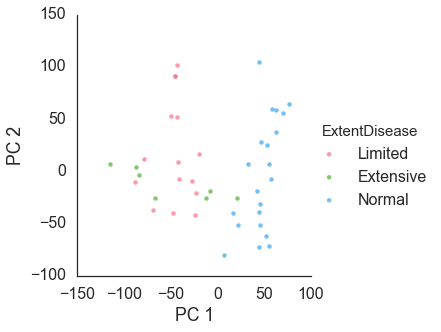

In [82]:
with sns.color_palette(sns.color_palette("hls", 2)):
    with sns.axes_style("white"):
        sns.lmplot(x='PC 1', y='PC 2', data=pca_t_l.append(pca_t_l.iloc[9,:]), #sns.lmplot(x='PC 1', y='PC 2', data=pca_t_l,
                   hue='ExtentDisease', palette=None,
                   fit_reg=False,
                   scatter_kws={'alpha':0.7}
                  );

# Feature Selection

## LogisticRegression method

- ran this a couple times manually and got varying numbers of features retained
- I decided to 
    - run it 100 times
    - count how frequently each feature is retained
    - keep the top X number of them

In [83]:
rlgrg = RandomizedLogisticRegression(C=1, scaling=0.5, 
                                      sample_fraction=0.70, n_resampling=500, 
                                      verbose=False, normalize=False, 
                                      random_state=None, n_jobs=1, )
# rlgrg.fit(X_, y_)
 



In [84]:
# select_k_best = SelectKBest(chi2, k=50)

In [85]:
# X_kbest = select_k_best.fit_transform(X, y_disease_encoded_any)

In [86]:
# select_k_best.scores_

In [87]:
# X.columns.values[select_k_best.get_support()]

In [88]:
t1 = time.time()

itr = 1
f_sel_db = feature_selection.consensus_top10pct_feature_selection(X=X, y=y_disease_encoded_any,
                                                      clf=rlgrg, names=None, iters=itr)

t2 = time.time()

In [89]:
seconds = t2-t1
print(seconds)

116.171915054


In [90]:
seconds/60

1.9361985842386882

In [91]:
len(f_sel_db)

5470

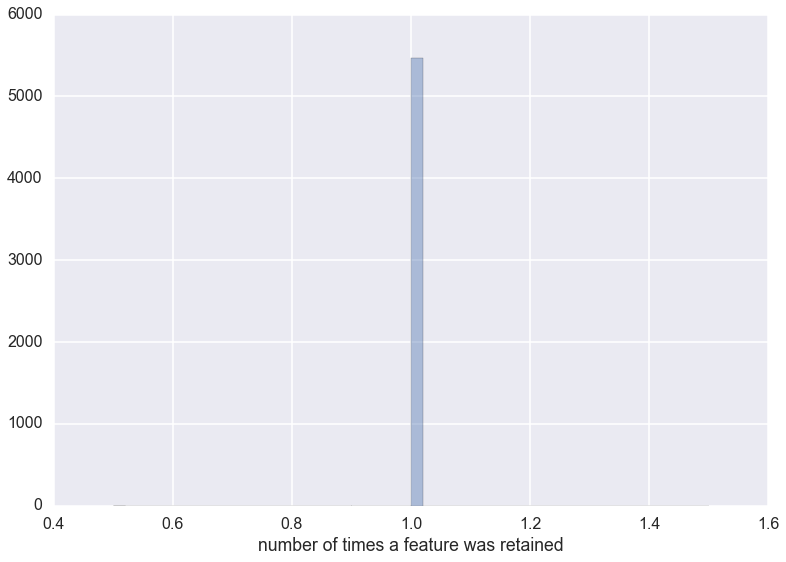

In [92]:
sns.distplot([len(l) for l in f_sel_db.values()], kde=False)
plt.xlabel('number of times a feature was retained');

### Look at the Features that were retained at least X times

In [93]:
my_features = feature_selection.process_retained_features(retained=f_sel_db, iters=itr)
my_features.head()

,avg_score,feature_names,retention_rate
0,0.000,_37652_PM_at,1
1,0.000,_241923_PM_x_at,1
2,0.000,_241736_PM_at,1
3,0.008,_204259_PM_at,1
4,0.000,_240856_PM_at,1


In [94]:
my_features.tail()

,avg_score,feature_names,retention_rate
5465,0,_41047_PM_at,1
5466,0,_241255_PM_at,1
5467,0,_241795_PM_at,1
5468,0,_51158_PM_at,1
5469,0,_243888_PM_at,1


In [95]:
my_features_ = my_features.sort_values(by='avg_score', axis=0, ascending=False).query("""retention_rate > 0.99""")
my_features_ = my_features_.query("""avg_score > 0.5 """)
my_features_.shape

(2, 3)

In [96]:
my_features_.head()

,avg_score,feature_names,retention_rate
1131,0.618,_219795_PM_at,1
2717,0.506,_206784_PM_at,1


In [97]:
my_features_.tail()

,avg_score,feature_names,retention_rate
1131,0.618,_219795_PM_at,1
2717,0.506,_206784_PM_at,1


In [98]:
X_best = X[my_features_.feature_names.values]
X_best.shape

(42, 2)

In [99]:
X_best

,_219795_PM_at,_206784_PM_at
ID,,
5500254131236090112252_101136.C02,10.140158,5.323102
5500254131236090112258_101136.E10,10.482177,5.552003
5500254131236090112256_101136.G08,11.023887,6.801303
5500254131236090112256_101136.E12,10.011436,9.427869
5500254131236090112259_101136.F12,10.801503,6.315544
5500254131236090112251_101136.D04,10.808175,4.899746
5500254131236090112258_101136.G09,10.698780,8.938404
5500254131236090112256_101136.C11,10.610472,6.231183
5500254131236090112258_101136.E05,11.397591,5.739588


In [101]:
top_n_sorted_features = 2

if top_n_sorted_features > X_best.shape[1]:
    raise ValueError("X_best.shape[1] is smaller than value provided for top_n_sorted_features.")

pca = PCA(n_components=2, whiten=False)
# pca = RandomizedPCA(n_components=2, whiten=False)

pca_t = pca.fit_transform(X_best.iloc[:,:top_n_sorted_features],y_disease_encoded_any)
top_n_comp = 2
print('explained_variance_ratio_ of top {num}: {val}'.format(num=top_n_comp,val=pca.explained_variance_ratio_[:top_n_comp].sum()))

pca_t_l = pandas_helpers.repandasify(array=pca_t, y_names=disease_encoder_any.inverse_transform(y_disease_encoded_any), X_names=['PC {v_}'.format(v_=v+1) for v in range(len(pca_t[0]))])
# print(pca_t_l)

explained_variance_ratio_ of top 2: 1.0


In [102]:
pca_t_l = pca_t_l.reset_index(drop=True)
pca_t_l['ExtentDisease'] = full_table['ExtentDisease']
pca_t_l['Disease_or_Normal'] = full_table['Disease_or_Normal']
# pca_t_l

In [103]:
plot_alpha = 0.7

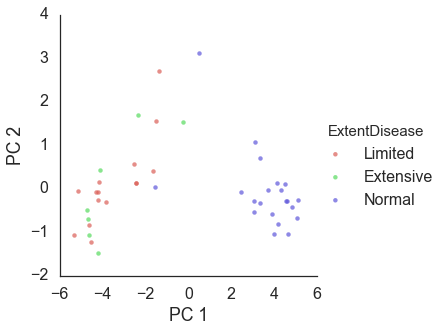

In [104]:
with sns.color_palette(sns.color_palette("hls", 3)):
    with sns.axes_style("white"):
        sns.lmplot(x='PC 1', y='PC 2', data=pca_t_l.append(pca_t_l.iloc[9,:]), #sns.lmplot(x='PC 1', y='PC 2', data=pca_t_l,
                   hue='ExtentDisease', palette=None,
                   fit_reg=False,
                   scatter_kws={'alpha':plot_alpha}
                  );

In [105]:
top_10 = my_features_.iloc[:10,:]

# Test crossvalidation results and preditions on reduced data

In [106]:
X_reduced = X[top_10.feature_names.values.astype(str)]

In [107]:
top_10.feature_names.values.astype(str)

array(['_219795_PM_at', '_206784_PM_at'], 
      dtype='|S13')

In [108]:
X_reduced.head()

,_219795_PM_at,_206784_PM_at
ID,,
5500254131236090112252_101136.C02,10.140158,5.323102
5500254131236090112258_101136.E10,10.482177,5.552003
5500254131236090112256_101136.G08,11.023887,6.801303
5500254131236090112256_101136.E12,10.011436,9.427869
5500254131236090112259_101136.F12,10.801503,6.315544


## split data into training and testing

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_disease_encoded_any,
                                                    test_size=0.33, random_state=42,
                                                    stratify=y_disease_encoded_any
                                                   )

# X_train, X_test, y_train, y_test = train_test_split(X, y_disease_encoded_spc,
#                                                     test_size=0.33, random_state=42,
#                                                     stratify=y_disease_encoded_spc
#                                                    )

In [110]:
y_train

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0])

In [111]:
y_test

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0])

In [112]:
y_disease_encoded_any

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Dummy Classifiers

In [113]:
dummy_strat = DummyClassifier(strategy='stratified')
dummy_freq = DummyClassifier(strategy='most_frequent')
dummy_unif = DummyClassifier(strategy='uniform')
# dummy_constant = DummyClassifier(strategy='constant', constant=1)

In [114]:
dummy_strat.fit(X_train, y_train)
dummy_freq.fit(X_train, y_train)
dummy_unif.fit(X_train, y_train)
# dummy_constant.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=None, strategy='uniform')

## dummy_strat

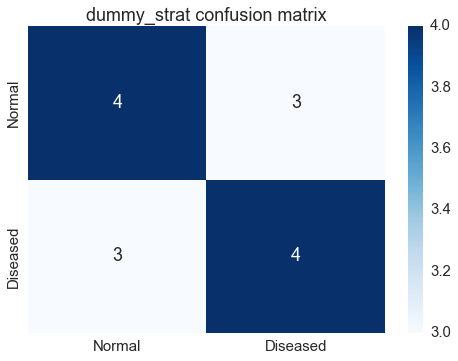

In [115]:
dummy_strat_cm = confusion_matrix(y_test,dummy_strat.predict(X_test))
model_assessment.plot_confusion_matrix(cm=dummy_strat_cm, labels=disease_encoder_any.classes_, cmap='Blues', title="dummy_strat confusion matrix",
                 norm=False, context=None, annot=True);

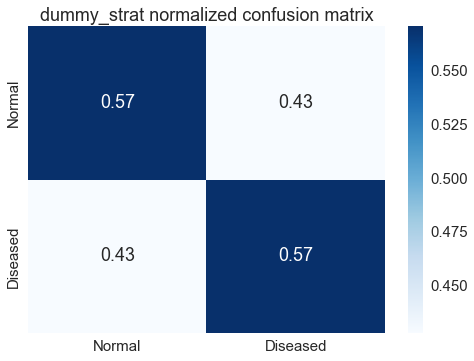

In [116]:
model_assessment.plot_confusion_matrix(cm=dummy_strat_cm, labels=disease_encoder_any.classes_, cmap='Blues', title="dummy_strat normalized confusion matrix",
                 norm=True, context=None, annot=True);

## dummy_freq

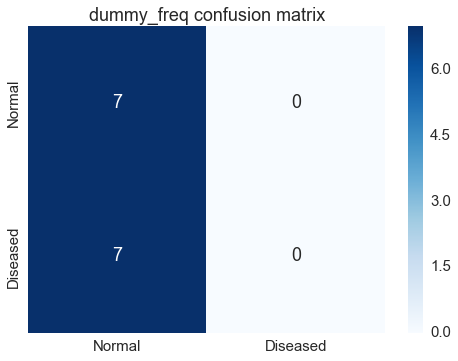

In [117]:
dummy_freq_cm = confusion_matrix(y_test,dummy_freq.predict(X_test))
model_assessment.plot_confusion_matrix(cm=dummy_freq_cm, labels=disease_encoder_any.classes_, cmap='Blues', title="dummy_freq confusion matrix",
                 norm=False, context=None, annot=True);

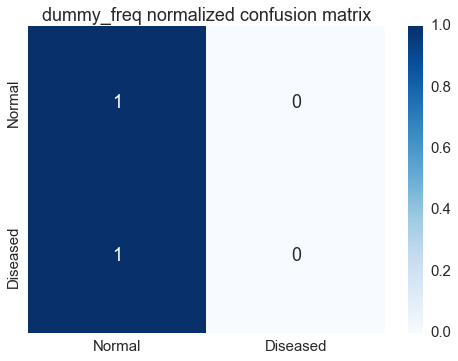

In [118]:
model_assessment.plot_confusion_matrix(cm=dummy_freq_cm, labels=disease_encoder_any.classes_, cmap='Blues', title="dummy_freq normalized confusion matrix",
                 norm=True, context=None, annot=True);

## dummy_unif

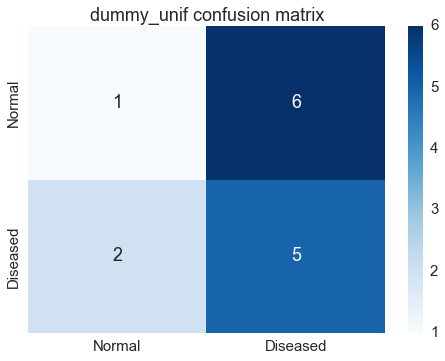

In [119]:
dummy_unif_cm = confusion_matrix(y_test,dummy_unif.predict(X_test))
model_assessment.plot_confusion_matrix(cm=dummy_unif_cm, labels=disease_encoder_any.classes_, cmap='Blues', title="dummy_unif confusion matrix",
                 norm=False, context=None, annot=True);

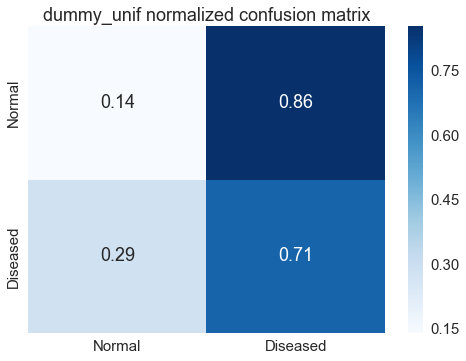

In [120]:
model_assessment.plot_confusion_matrix(cm=dummy_unif_cm, labels=disease_encoder_any.classes_, cmap='Blues', title="dummy_unif normalized confusion matrix",
              norm=True, context=None, annot=True);

## SVM classifier

In [121]:
SVC

sklearn.svm.classes.SVC

In [122]:
svc_param_grid = {'svc__C': 10. ** np.arange(-3, 3),
                  'svc__gamma': 10. ** np.arange(-3, 3)
                 }



svc_pipe = make_pipeline(SVC(kernel='linear', random_state=42))

# run the gridsearch to tune the hyper-parameters
svc_grid = GridSearchCV(svc_pipe, param_grid=svc_param_grid, cv=10)

svc_grid.fit(X_train, y_train)
print(svc_grid.best_params_)


# generate and plot confusion matrices
svc_cm = confusion_matrix(y_test,svc_grid.predict(X_test))



{'svc__gamma': 0.001, 'svc__C': 0.001}


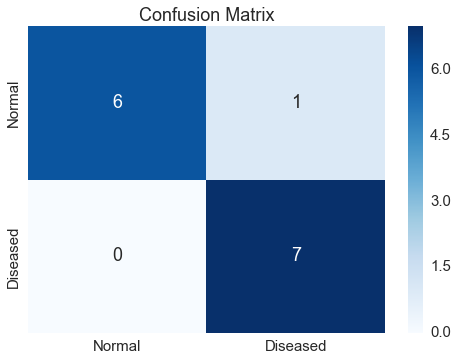

In [123]:
# Non-normalized
model_assessment.plot_confusion_matrix(cm=svc_cm, labels=disease_encoder_any.classes_, cmap='Blues', title=None,
                 norm=False, context=None, annot=True);


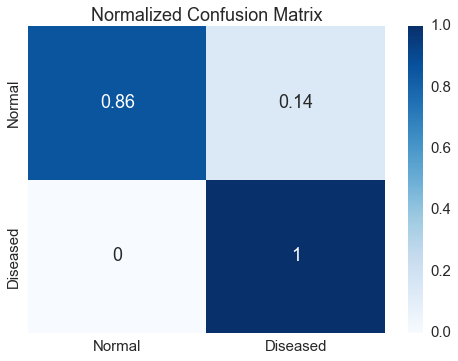

In [124]:
# Normalized
model_assessment.plot_confusion_matrix(cm=svc_cm, labels=disease_encoder_any.classes_, cmap='Blues', title=None,
                 norm=True, context=None, annot=True);

## RandomForest classifier

In [125]:
rfst_param_grid = {'randomforestclassifier__n_estimators': np.arange(1,15,),
                   'randomforestclassifier__min_samples_leaf': np.arange(1,10,2)
                  }



rfst_pipe = make_pipeline(RandomForestClassifier(random_state=42,n_jobs=8))

# run the gridsearch to tune the hyper-parameters
rfst_grid = GridSearchCV(rfst_pipe, param_grid=rfst_param_grid, cv=3)


rfst_grid.fit(X_train, y_train)
print(rfst_grid.best_params_)


# generate and plot confusion matrices
rfst_cm = confusion_matrix(y_test,rfst_grid.predict(X_test))

{'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__n_estimators': 3}


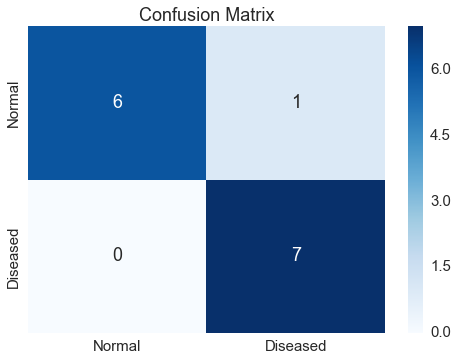

In [126]:
# Non-normalized
model_assessment.plot_confusion_matrix(cm=svc_cm, labels=disease_encoder_any.classes_, cmap='Blues', title=None,
                 norm=False, context=None, annot=True);

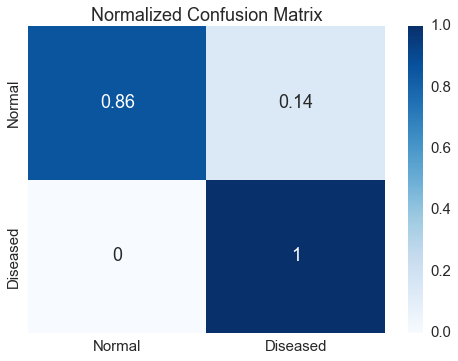

In [127]:
# Normalized
model_assessment.plot_confusion_matrix(cm=svc_cm, labels=disease_encoder_any.classes_, cmap='Blues', title=None,
                 norm=True, context=None, annot=True);

## LogisticRegression classifier

In [128]:
log_reg_param_grid = {'logisticregression__penalty': ['l1','l2'],
                     }



log_reg_pipe = make_pipeline(LogisticRegression(random_state=42,n_jobs=8))

# run the gridsearch to tune the hyper-parameters
log_reg_grid = GridSearchCV(log_reg_pipe, param_grid=log_reg_param_grid, cv=5)


log_reg_grid.fit(X_train, y_train)
print(log_reg_grid.best_params_)


# generate and plot confusion matrices
log_reg_cm = confusion_matrix(y_test,log_reg_grid.predict(X_test))

{'logisticregression__penalty': 'l1'}


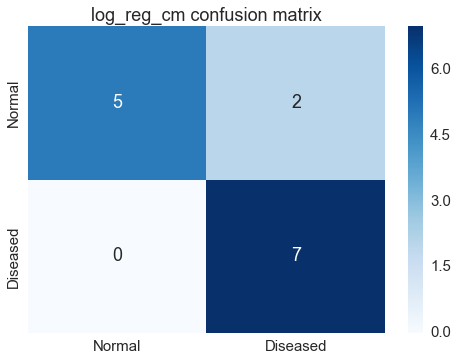

In [129]:
model_assessment.plot_confusion_matrix(cm=log_reg_cm, labels=disease_encoder_any.classes_, cmap='Blues', title="log_reg_cm confusion matrix",
              norm=False, context=None, annot=True);

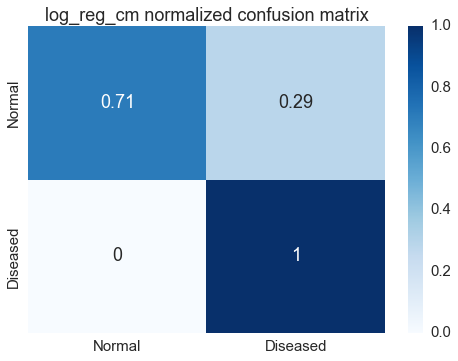

In [130]:
model_assessment.plot_confusion_matrix(cm=log_reg_cm, labels=disease_encoder_any.classes_, cmap='Blues', title="log_reg_cm normalized confusion matrix",
              norm=True, context=None, annot=True);

# What genes/probes did we recover?

In [131]:
mapping_table_file = pd.read_excel('/home/gus/MEGAsync/zim/main/BCH/Projects/Jodie_and_James/comparison_gus_v2.xls')
mapping_table = mapping_table_file[['probes','GENE_SYMBOL']]

In [132]:
mapping_table.head()

,probes,GENE_SYMBOL
0,1552281_PM_at,SLC39A5
1,1552296_PM_at,BEST4
2,1552365_PM_at,SCIN
3,1552367_PM_a_at,SCIN
4,1552497_PM_a_at,SLAMF6


In [133]:
my_probes = [x[1:] for x in X_reduced.columns.values]

In [134]:
mapping_table[mapping_table.probes.apply(lambda x: x in my_probes)]

,probes,GENE_SYMBOL
640,206784_PM_at,AQP8
1340,219795_PM_at,SLC6A14
